In [82]:
import yfinance as yf
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt

import statsmodels.api as sm
import pylab
from scipy.stats import skew, kurtosis, jarque_bera
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [83]:
plt.style.use('seaborn')

/tmp/ipykernel_1243011/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [84]:
exchange_path = 'results/tstr_log-8/'
msft_path = 'results/tstr_log-9/'
aapl_path = 'results/tstr_log-11/'
btc_path = 'results/tstr_log-12/'
gspc_path = 'results/tstr_log-13/'
stocks_path = 'results/tstr_log-10/'
gbm_path = '../results/tstr_log-5/'
electricity_path = '../results/tstr_log-8/'

In [85]:
data_path = gbm_path

In [86]:
real = np.load(data_path + 'real_samples.npy')
synth = np.load(data_path + 'synth_samples.npy')

In [87]:
real.shape

(10000, 390)

In [88]:
synth.shape

(10000, 390)

In [89]:
# plt.plot(real[0]**2, label='real')
# plt.plot(synth[0]**2, label='synth')
# plt.legend()

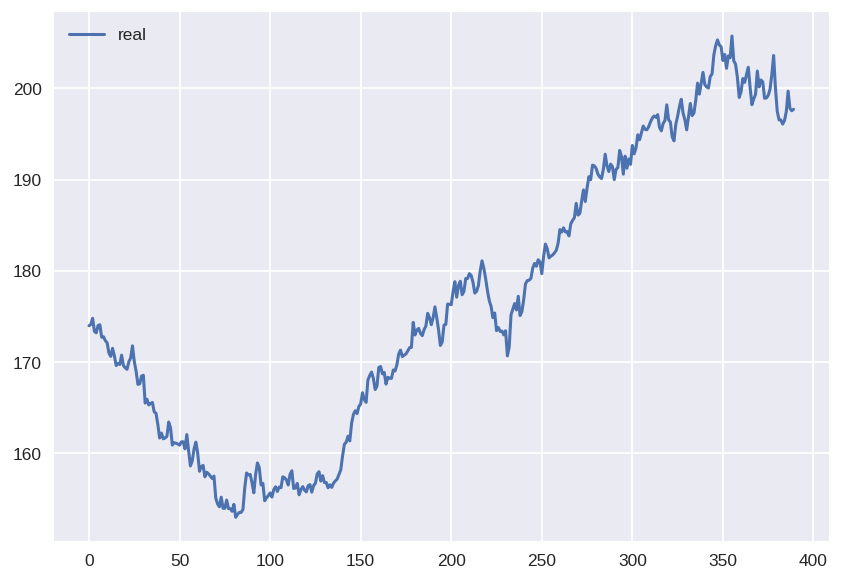

In [90]:
plt.plot(real[0], label='real')
plt.legend()

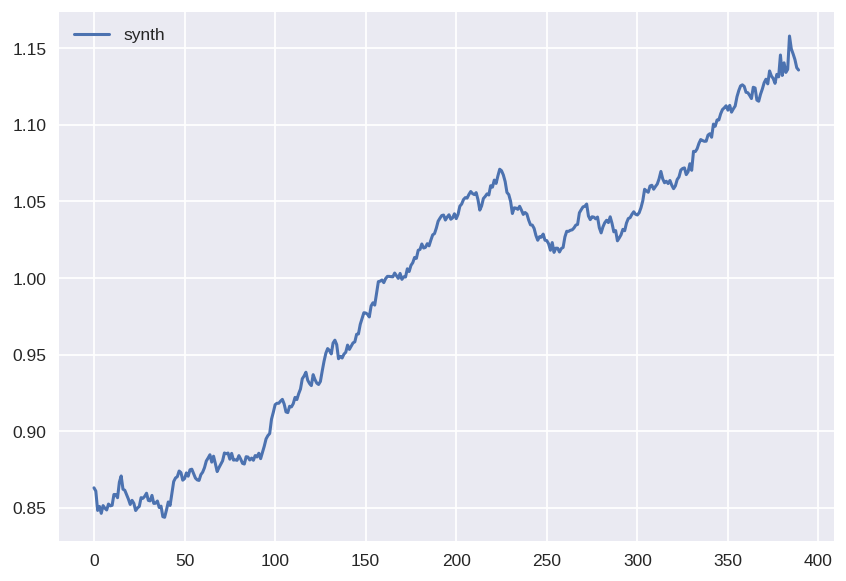

In [91]:
plt.plot(synth[0], label='synth')
plt.legend()

In [92]:
from uncond_ts_diff.utils import descale

In [93]:
scale = np.mean(
            np.abs(real[..., : -30]),
            axis=-1,
            keepdims=True,
        )
scale

array([[174.61519 ],
       [143.60452 ],
       [144.30505 ],
       ...,
       [116.05992 ],
       [118.202736],
       [128.70761 ]], dtype=float32)

In [94]:
synth_descaled = descale(synth, scale, 'mean')

In [95]:
synth_descaled

array([[150.70682 , 150.33936 , 148.13135 , ..., 199.52504 , 198.59592 ,
        198.33153 ],
       [121.36339 , 122.58123 , 122.766846, ..., 160.13788 , 162.51198 ,
        163.39603 ],
       [118.62523 , 118.77618 , 118.24876 , ..., 163.57039 , 164.56508 ,
        163.09615 ],
       ...,
       [103.25339 , 102.574005, 103.26964 , ..., 128.96875 , 130.61673 ,
        130.15472 ],
       [ 85.764206,  87.46314 ,  89.10369 , ..., 133.57314 , 133.37657 ,
        129.50609 ],
       [109.2447  , 109.65645 , 109.57089 , ..., 150.50417 , 149.0183  ,
        149.91391 ]], dtype=float32)

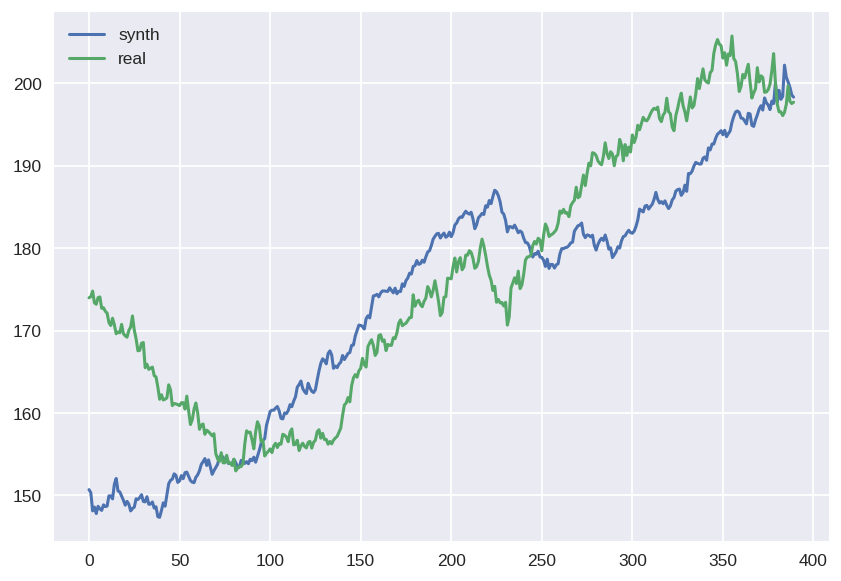

In [116]:
plt.plot(synth_descaled[0], label='synth')
plt.plot(real[0], label='real')
plt.legend()

In [97]:
n = real.shape[1]

In [98]:
def estimate_gbm_parameters(prices: np.ndarray):

    # Calculate log returns
    log_returns = np.log(prices[1:] / prices[:-1])

    # Estimate mu (annualized)
    mu = np.mean(log_returns) * n  # Assuming 252 trading days in a year

    # Estimate sigma (annualized)
    sigma = np.std(log_returns) * np.sqrt(n)

    # Adjust mu for continuous compounding
    mu_adjusted = mu + (sigma**2 / 2)

    return mu_adjusted, sigma


In [114]:
mus = []
sigmas = []

for prices in real:
  mu, sigma = estimate_gbm_parameters(prices)
  mus.append(mu)
  sigmas.append(sigma)
print("Estimated mu:", np.mean(mus))
print("Estimated sigma:", np.mean(sigmas))

Estimated mu: 0.19650465154309127
Estimated sigma: 0.12472118884001634


In [115]:
mus = []
sigmas = []

for prices in synth_descaled:
  mu, sigma = estimate_gbm_parameters(prices)
  mus.append(mu)
  sigmas.append(sigma)
print("Estimated mu:", np.mean(mus))
print("Estimated sigma:", np.mean(sigmas))

Estimated mu: 0.28918109596496816
Estimated sigma: 0.08535476352703208


(array([75., 33., 29., 59., 44., 25., 11., 32., 54., 28.]),
 array([152.97964478, 158.2555542 , 163.53146362, 168.80737305,
        174.08328247, 179.35919189, 184.63510132, 189.91101074,
        195.18692017, 200.46282959, 205.73873901]),
 <BarContainer object of 10 artists>)

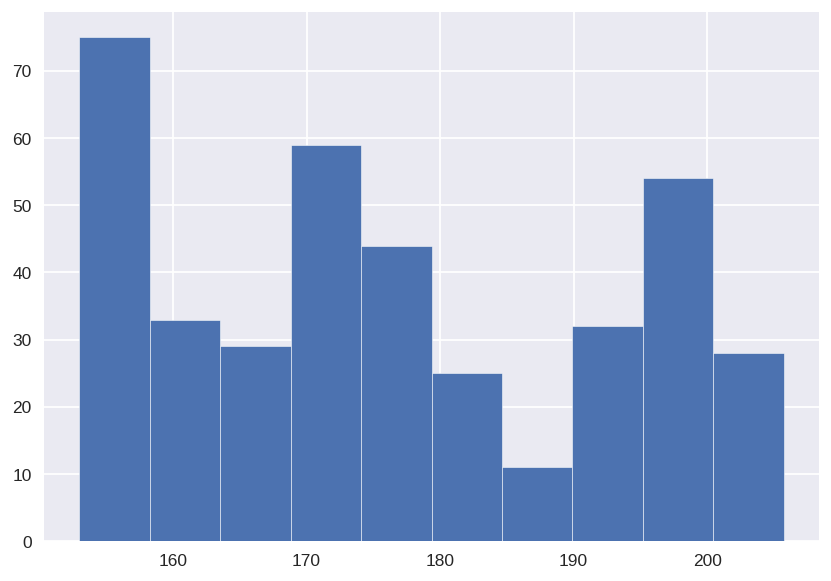

In [101]:
plt.hist(real[0], label='real')

(array([62., 36., 27., 22., 21., 50., 96., 28., 28., 20.]),
 array([0.8438561 , 0.87527132, 0.90668654, 0.93810171, 0.96951693,
        1.00093222, 1.03234732, 1.06376255, 1.09517777, 1.12659299,
        1.15800822]),
 <BarContainer object of 10 artists>)

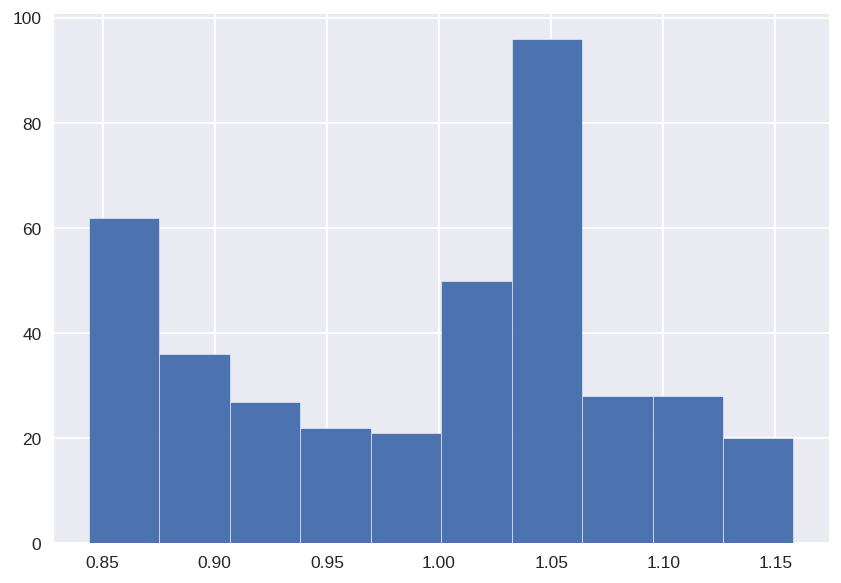

In [102]:
plt.hist(synth[0], label='synth')

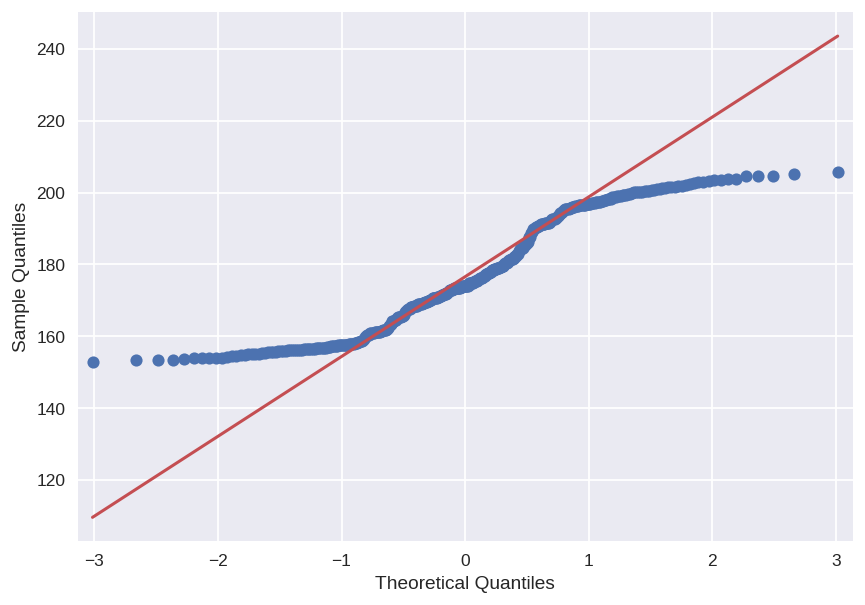

In [103]:
sm.qqplot(real[0], line='q', a=1/2)
pylab.show()

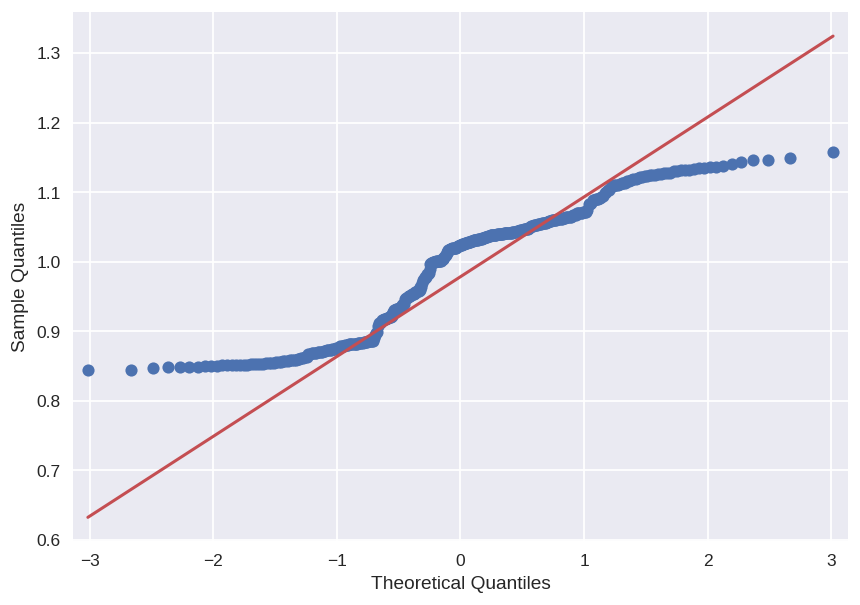

In [104]:
sm.qqplot(synth[0], line='q', a=1/2)
pylab.show()

In [105]:
mean_ret = np.mean(real[0])
std_dev_ret = np.std(real[0])
skewness_ret = skew(real[0])
kurtosis_ret = kurtosis(real[0])  # This function returns excess kurtosis by default

print("real: Sample Mean:", mean_ret)
print("real: Sample Standard Deviation:", std_dev_ret)
print("real: Sample Skewness:", skewness_ret)
print("real: Sample Kurtosis:", kurtosis_ret)

jb_test = jarque_bera(real[0])
print("real: Jarque-Bera test statistic:", jb_test.statistic)
print("real: Jarque-Bera test p-value:", jb_test.pvalue)


real: Sample Mean: 176.51894
real: Sample Standard Deviation: 15.769515
real: Sample Skewness: 0.22788050270431556
real: Sample Kurtosis: -1.2557424132317099
real: Jarque-Bera test statistic: 28.999836786795424
real: Jarque-Bera test p-value: 5.043888223464344e-07


In [106]:
mean_ret = np.mean(synth[0])
std_dev_ret = np.std(synth[0])
skewness_ret = skew(synth[0])
kurtosis_ret = kurtosis(synth[0])  # This function returns excess kurtosis by default

print("synthetic: Sample Mean:", mean_ret)
print("synthetic: Sample Standard Deviation:", std_dev_ret)
print("synthetic: Sample Skewness:", skewness_ret)
print("synthetic: Sample Kurtosis:", kurtosis_ret)

jb_test = jarque_bera(synth[0])
print("synthetic: Jarque-Bera test statistic:", jb_test.statistic)
print("synthetic: Jarque-Bera test p-value:", jb_test.pvalue)

synthetic: Sample Mean: 0.9932291
synthetic: Sample Standard Deviation: 0.08878787
synthetic: Sample Skewness: -0.23845419035975587
synthetic: Sample Kurtosis: -1.1889680360597954
synthetic: Jarque-Bera test statistic: 26.667632049477433
synthetic: Jarque-Bera test p-value: 1.618815215506153e-06


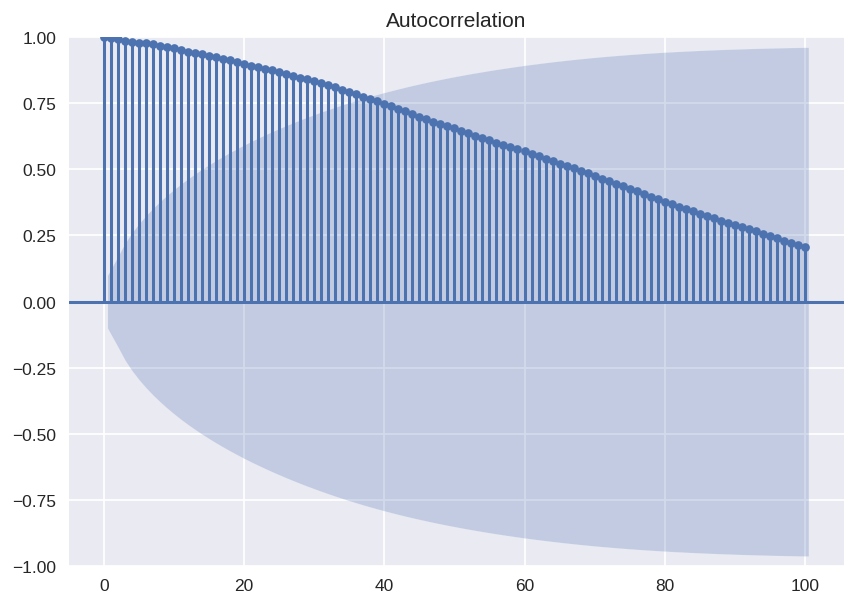

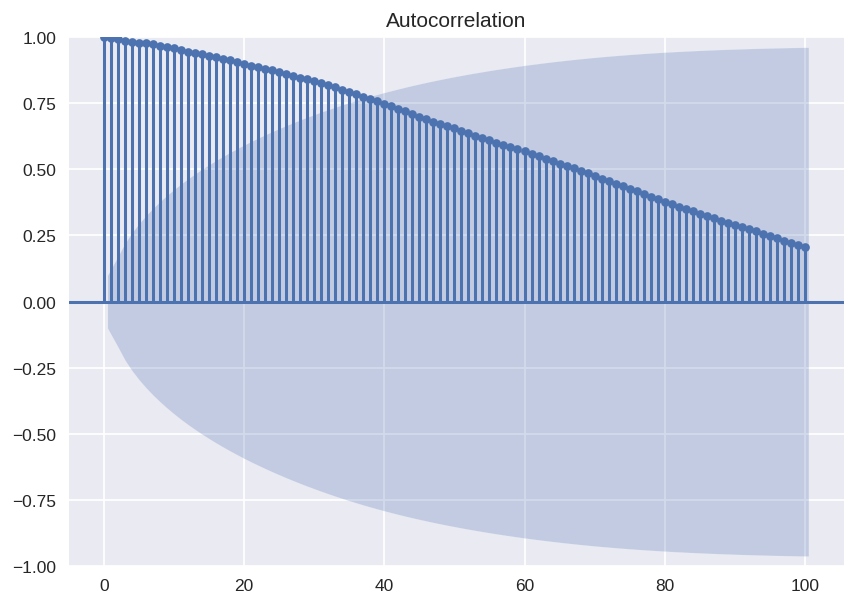

In [107]:
plot_acf(real[0], lags=100)

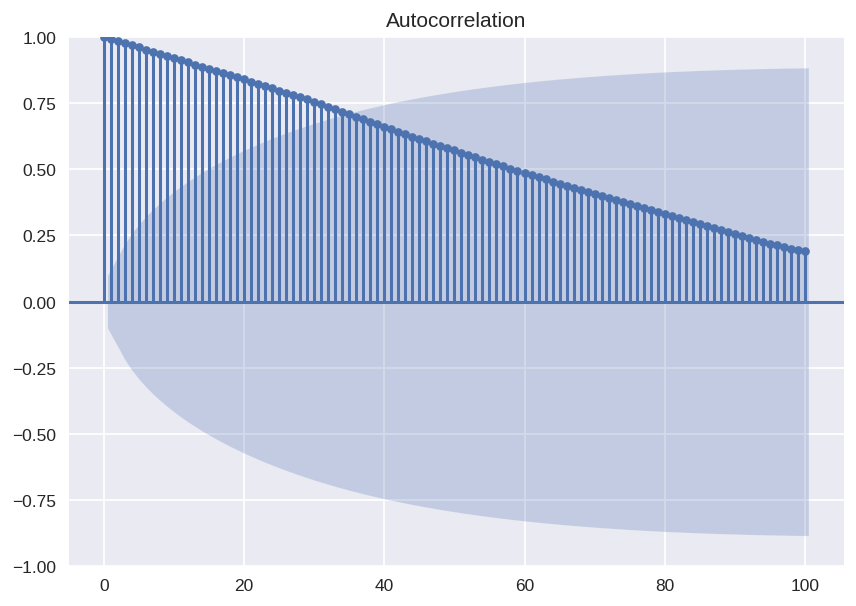

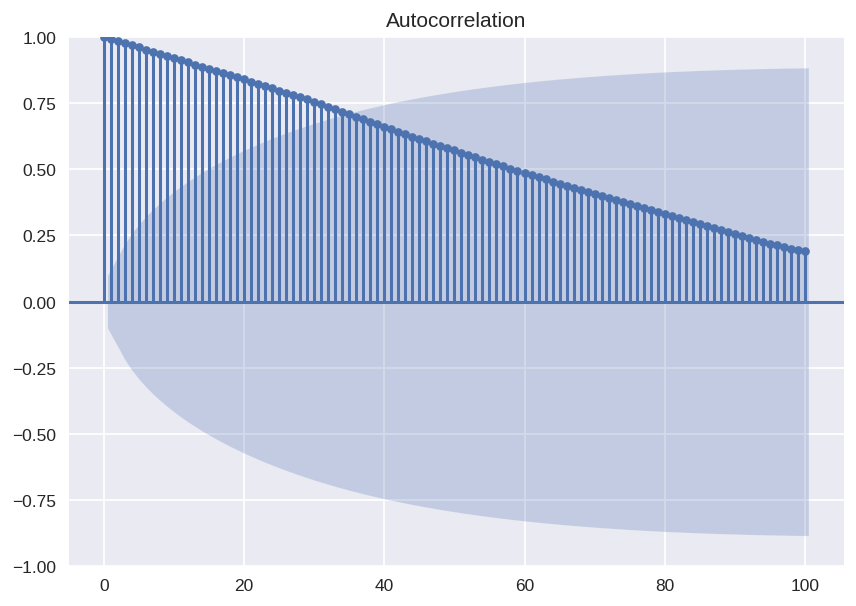

In [108]:
plot_acf(synth[0], lags=100)

In [109]:
# Calculate Ljung-Box Q statistic for lags 1 to 10
results = acorr_ljungbox(real[0], lags=10, return_df=True)
print("Ljung-Box Q statistic")
# Print the results
for lag in range(1, 11):
    print(f"real: Lag: {lag}, Statistic: {results.loc[lag, 'lb_stat']}, p-value: {results.loc[lag, 'lb_pvalue']}")

Ljung-Box Q statistic
real: Lag: 1, Statistic: 389.3505708610904, p-value: 1.1461964741174933e-86
real: Lag: 2, Statistic: 776.1692452890793, p-value: 2.864111189385002e-169
real: Lag: 3, Statistic: 1160.7312970737455, p-value: 2.4270623686008485e-251
real: Lag: 4, Statistic: 1542.9183696534212, p-value: 0.0
real: Lag: 5, Statistic: 1923.1821260435743, p-value: 0.0
real: Lag: 6, Statistic: 2301.965867354973, p-value: 0.0
real: Lag: 7, Statistic: 2679.0227761334068, p-value: 0.0
real: Lag: 8, Statistic: 3053.6973710135794, p-value: 0.0
real: Lag: 9, Statistic: 3425.672617138378, p-value: 0.0
real: Lag: 10, Statistic: 3794.492981259124, p-value: 0.0


In [110]:
# Calculate Ljung-Box Q statistic for lags 1 to 10
results = acorr_ljungbox(synth[0], lags=10, return_df=True)
print("Ljung-Box Q statistic")


# Print the results
for lag in range(1, 11):
    print(f"synthetic: Lag: {lag}, Statistic: {results.loc[lag, 'lb_stat']}, p-value: {results.loc[lag, 'lb_pvalue']}")



Ljung-Box Q statistic
synthetic: Lag: 1, Statistic: 387.5004330710578, p-value: 2.8976133777782365e-86
synthetic: Lag: 2, Statistic: 770.4206952072492, p-value: 5.073079447812513e-168
synthetic: Lag: 3, Statistic: 1148.0151293889894, p-value: 1.3930726215030548e-248
synthetic: Lag: 4, Statistic: 1520.146069049448, p-value: 0.0
synthetic: Lag: 5, Statistic: 1886.5873883920608, p-value: 0.0
synthetic: Lag: 6, Statistic: 2247.2111115259167, p-value: 0.0
synthetic: Lag: 7, Statistic: 2602.684953520452, p-value: 0.0
synthetic: Lag: 8, Statistic: 2953.0640684971095, p-value: 0.0
synthetic: Lag: 9, Statistic: 3298.3011357252226, p-value: 0.0
synthetic: Lag: 10, Statistic: 3638.6456002440696, p-value: 0.0


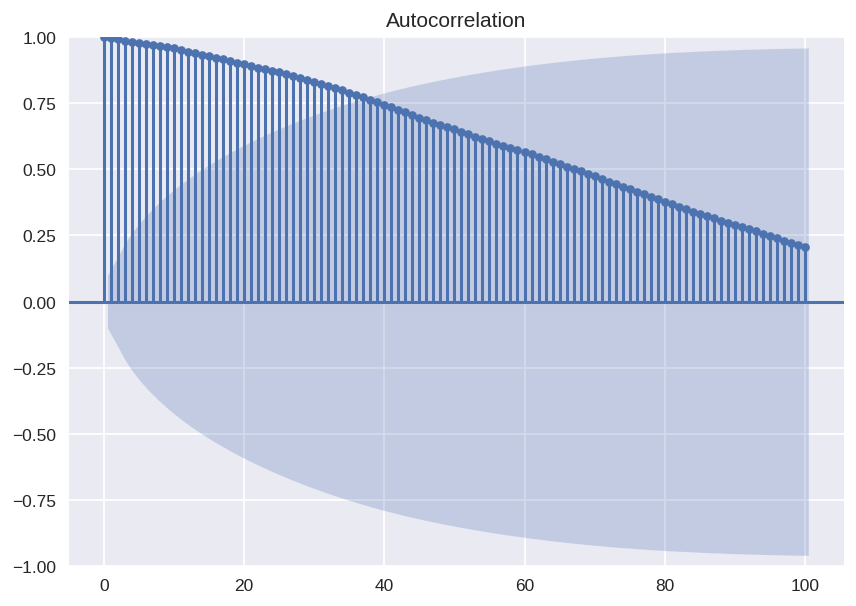

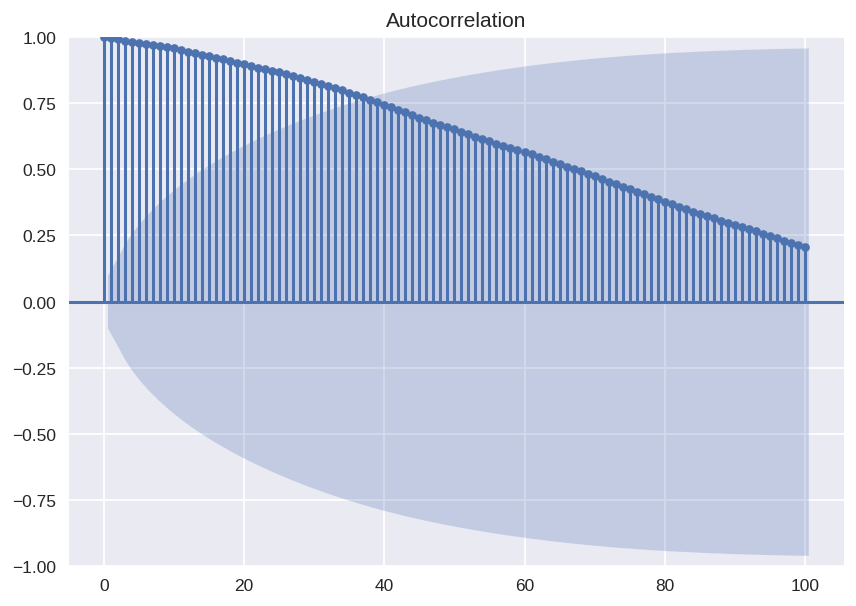

In [111]:
plot_acf(real[0]**2, lags=100)

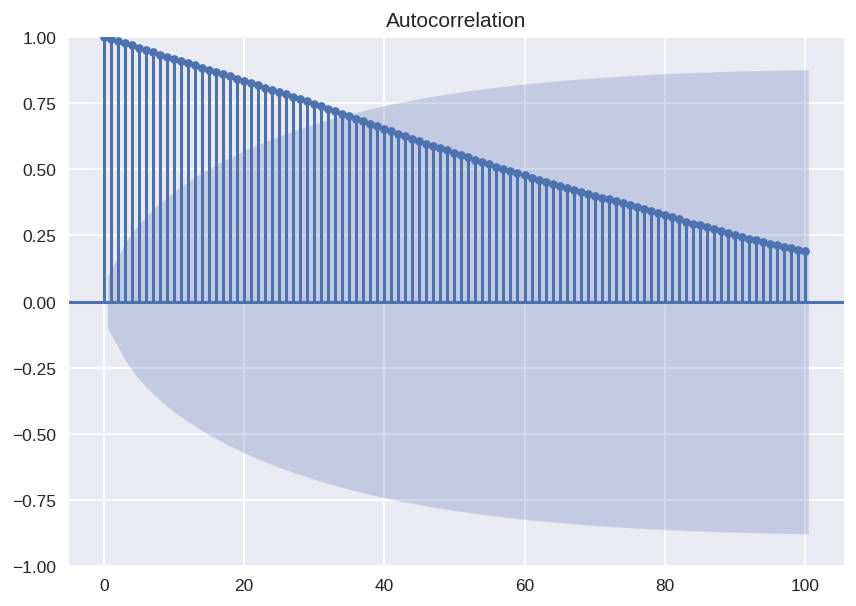

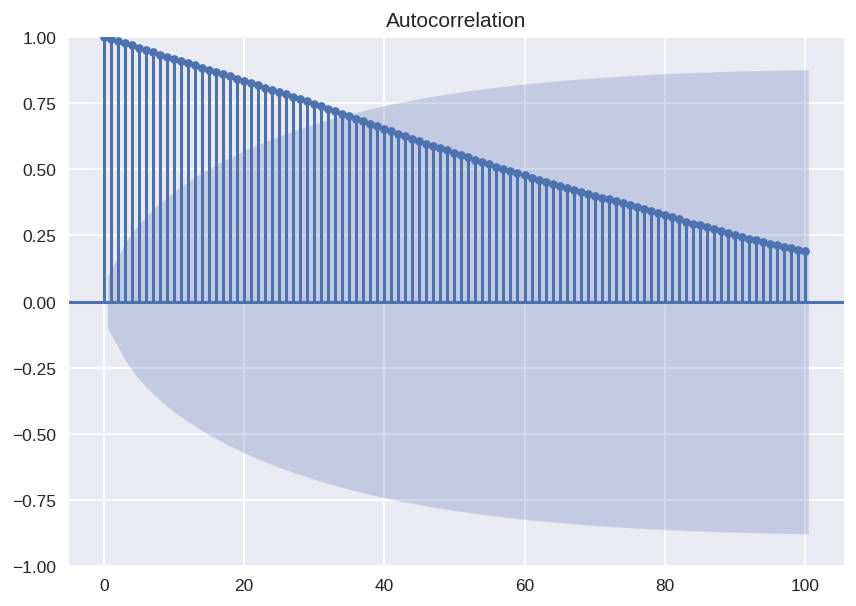

In [112]:
plot_acf(synth[0]**2, lags=100)